### Libraries

In [82]:
from mobfot import MobFot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from mplsoccer import VerticalPitch


In [83]:
client = MobFot()

### League id

In [84]:
leagues = pd.DataFrame({"League Name": ["Premier League", "Serie A", "Bundesliga", "Ligue 1", "LaLiga", "Süper Lig"],
                        "League Id": [47, 55, 54, 53, 87, 71]})

In [85]:
leagues

,League Name,League Id
0,Premier League,47
1,Serie A,55
2,Bundesliga,54
3,Ligue 1,53
4,LaLiga,87
5,Süper Lig,71


### League Select

In [86]:
league_name = "Bundesliga"

In [87]:
if league_name in leagues["League Name"].values:
    league_id = leagues.loc[leagues["League Name"] == league_name, "League Id"].values[0]
else:
    print("Wrong team name!")

In [88]:
league = client.get_league(league_id)

### her takım

In [89]:
# Create an empty DataFrame with column names
league_df = pd.DataFrame(columns=["team_name", "team_id"])

# Define the number of rows you want in the DataFrame
num_rows = len(league["table"][0]["data"]["table"]["all"])

In [90]:
# Create an empty DataFrame with column names
league_df = pd.DataFrame(columns=["team_name", "team_id"])

# Define the number of rows you want in the DataFrame
num_rows = len(league["table"][0]["data"]["table"]["all"])

# Use a for loop to add rows to the DataFrame
for i in range(num_rows):
    # Create a new row as a dictionary
    new_row = {"team_name": league["table"][0]["data"]["table"]["all"][i]["name"], "team_id": league["table"][0]["data"]["table"]["all"][i]["id"]}
    
    # Append the new row to the DataFrame
    league_df = pd.concat([league_df, pd.DataFrame([new_row])], ignore_index=True)

# Print the resulting DataFrame
print(league_df)

              team_name team_id
0      Bayer Leverkusen    8178
1         VfB Stuttgart   10269
2        Bayern München    9823
3     Borussia Dortmund    9789
4        TSG Hoffenheim    8226
5            RB Leipzig  178475
6             Wolfsburg    8721
7   Eintracht Frankfurt    9810
8           SC Freiburg    8358
9         FC Heidenheim   94937
10         SV Darmstadt    8262
11  Borussia M'Gladbach    9788
12         Union Berlin    8149
13        Werder Bremen    8697
14          FC Augsburg    8406
15           VfL Bochum    9911
16             Mainz 05    9905
17           1. FC Köln    8722


### Select Team

In [91]:
team_name = "Bayer Leverkusen"

In [92]:
if team_name in league_df["team_name"].values:
    team_id = league_df.loc[league_df["team_name"] == team_name, "team_id"].values[0]
else:
    print("Wrong team name!")

In [93]:
team = client.get_team(team_id)

In [94]:
keepers = team["squad"][1][1]
defenders = team["squad"][2][1]
midfielders = team["squad"][3][1]
attackers = team["squad"][4][1]

In [95]:
players = keepers + defenders + midfielders + attackers

### players

In [96]:
# Create an empty DataFrame with column names
player_df = pd.DataFrame(columns=["player_name", "player_id"])

# Define the number of rows you want in the DataFrame
num_rows = len(players)

# Use a for loop to add rows to the DataFrame
for i in range(num_rows):
    # Create a new row as a dictionary
    new_row = {"player_name": players[i]["name"], "player_id": players[i]["id"]}
    
    # Append the new row to the DataFrame
    player_df = pd.concat([player_df, pd.DataFrame([new_row])], ignore_index=True)

# Print the resulting DataFrame
print(player_df)

             player_name player_id
0         Lukas Hradecky     66757
1            Niklas Lomb    358675
2            Matej Kovar   1077903
3          Alex Grimaldo    288406
4           Jonathan Tah    469700
5         Edmond Tapsoba    789914
6         Josip Stanisic    950824
7       Jeremie Frimpong    966018
8       Odilon Kossounou   1014496
9         Piero Hincapié   1137667
10                Arthur   1353457
11          Granit Xhaka    207236
12        Robert Andrich    411851
13          Nadiem Amiri    614449
14   Timothy Fosu-Mensah    639058
15     Exequiel Palacios    693599
16         Florian Wirtz   1152455
17           Noah Mbamba   1225704
18        Gustavo Puerta   1331597
19          Ayman Aourir   1367056
20         Jonas Hofmann    331542
21         Patrik Schick    540097
22          Nathan Tella    877700
23           Adam Hlozek    969870
24  Victor Okoh Boniface   1035208
25            Amine Adli   1079557


### Select Player

In [97]:
playername = "Victor Okoh Boniface"

In [98]:
if playername in player_df["player_name"].values:
    player_id = player_df.loc[player_df["player_name"] == playername, "player_id"].values[0]
else:
    print("Wrong player name!")

In [99]:
player = client.get_player(player_id)

In [100]:
player_name = player["name"]

In [101]:
player.keys()

dict_keys(['id', 'name', 'origin', 'playerProps', 'injuryInformation', 'lastLeague', 'recentMatches', 'careerStatistics', 'careerHistory', 'QAData', 'isCoach', 'meta'])

In [102]:
player_min_played = player["careerStatistics"][0]["seasons"][0]["stats"][0]["statsArr"][3][1]["value"]
player_goals = player["careerStatistics"][0]["seasons"][0]["stats"][0]["statsArr"][5][1]["value"]
player_xgoals = player["careerStatistics"][0]["seasons"][0]["stats"][0]["statsArr"][6][1]["value"]
player_assists = player["careerStatistics"][0]["seasons"][0]["stats"][0]["statsArr"][12][1]["value"]
player_keypasses = player["careerStatistics"][0]["seasons"][0]["stats"][0]["statsArr"][13][1]["value"]

### Matches

In [103]:
matches = list(player["recentMatches"].values())[0]
last_one = matches[0]

In [104]:
# Create an empty DataFrame with column names
matches_df = pd.DataFrame(columns=[])

# Define the number of rows you want in the DataFrame
num_rows = len(matches)

# Use a for loop to add rows to the DataFrame
for i in range(num_rows):
    if int(matches[i]["date"]["utcTime"][0:10][5:7]) > 6:
        # Create a new row as a dictionary
        new_row = {"opponent_name": matches[i]["versus"]["opponentName"], 
                   "opponent_id": matches[i]["versus"]["opponentId"], 
                   "match_id": matches[i]["versus"]["matchId"]}
        
        # Append the new row to the DataFrame
        matches_df = pd.concat([matches_df, pd.DataFrame([new_row])], ignore_index=True)

# Print the resulting DataFrame
# print(matches_df)


# Define a dictionary to map old values to new values
value_mapping = {"Brighton": "Brighton & Hove Albion", 
                 "West Ham": "West Ham United", 
                 "Tottenham": "Tottenham Hotspur",
                 "Wolverhampton": "Wolverhampton Wanderers"}

# Use the .replace() method to replace values
matches_df["opponent_name"] = matches_df["opponent_name"].replace(value_mapping)
# Print the resulting DataFrame
print(matches_df)

           opponent_name  opponent_id  match_id
0             1. FC Köln         8722   4221778
1                  Molde         9917   4315155
2               Mainz 05         9905   4221769
3          FC Heidenheim        94937   4221760
4                 Häcken         8428   4315153
5         Bayern München         9823   4221748
6  Sao Tome and Principe       287979   3876938
7           SV Darmstadt         8262   4221741
8    Borussia M'Gladbach         9788   4221734
9             RB Leipzig       178475   4221724


### All league games

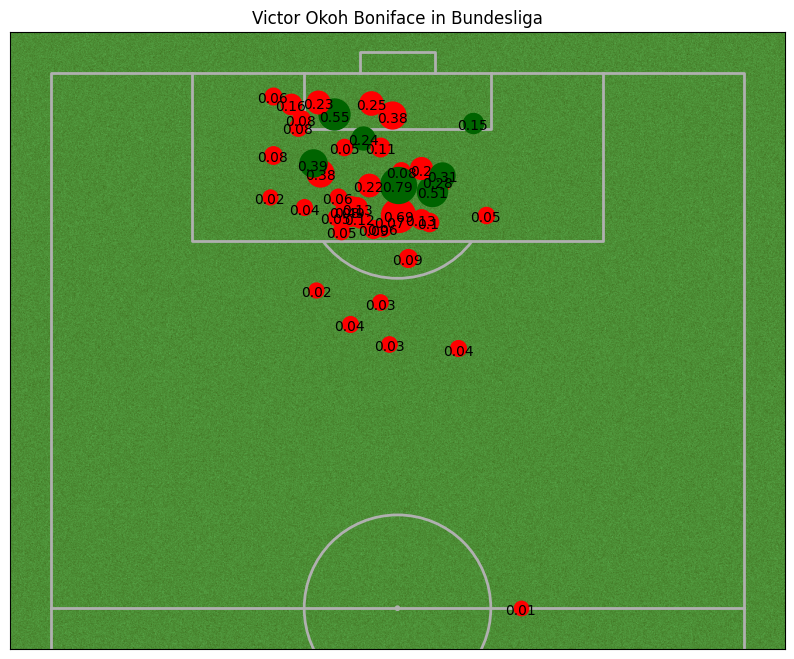

In [105]:
i=0
fig = plt.figure(figsize = (10,10), dpi = 100)
ax = plt.subplot(111)

colors = "red"

# Notice the extra parameters passed to the object
pitch = VerticalPitch(
    pitch_type = "uefa",
    half = True,
    axis = True, 
    label = False, 
    tick = False,
    pitch_color="grass",
    goal_type="box"
)
pitch.draw(ax = ax)

for i in range(len(matches_df)):
    opponent_name = matches_df.loc[i]["opponent_name"]
    if opponent_name in league_df["team_name"].to_list():
        opponent_id = matches_df.loc[i]["opponent_id"]
        match_id = matches_df.loc[i]["match_id"]
        get_match =  client.get_match_details(match_id)
        get_match1 = list(get_match.values())
        match_events = list(get_match1[5].values())
        match_shots = match_events[4]["shots"]
        length = len(match_shots)
        y=0
        for y in range(length):
            ax.set_title(playername + " in " + league_name)
            if match_shots[y]["playerName"] == playername and match_shots[y]["eventType"] == "Goal":
                colors = "darkgreen"
                ax.scatter(match_shots[y]["y"],match_shots[y]["x"], s = (round(match_shots[y]["expectedGoals"], 2)*720) + 100, c=colors)
                ax.annotate(round(match_shots[y]["expectedGoals"], 2), (match_shots[y]["y"],match_shots[y]["x"]), textcoords="offset points", xytext=(0, -5),  ha="center")
            if match_shots[y]["playerName"] == playername and match_shots[y]["eventType"] != "Goal":
                colors = "red"
                ax.scatter(match_shots[y]["y"],match_shots[y]["x"], s = (round(match_shots[y]["expectedGoals"], 2)*720) + 100, c=colors)
                ax.annotate(round(match_shots[y]["expectedGoals"], 2), (match_shots[y]["y"],match_shots[y]["x"]), textcoords="offset points", xytext=(0, -5),  ha="center")

#### Save Fig

In [25]:
# fig=plt.figure(figsize=(15, 10.38), dpi=100, facecolor='#3E3E40')
# fig = plt.figure(figsize = (8,8), dpi = 100)
# ax = plt.subplot(111)

# colors = "red"

# # Notice the extra parameters passed to the object
# pitch = VerticalPitch(
#     pitch_type = "uefa",
#     half = True,
#     axis = True, 
#     label = False, 
#     tick = False,
#     pitch_color="grass",
#     goal_type="box"
# )
# pitch.draw(ax = ax)
# plt.savefig('plotly_add_pitch.png', format='png', bbox_inches='tight', pad_inches=0)

#### Opponent Selection

In [106]:
versus = "Bayern München"

In [107]:
if versus in matches_df["opponent_name"].values:    
    opponent_name = matches_df.loc[matches_df["opponent_name"] == versus, "opponent_name"].values[0]
    opponent_id = matches_df.loc[matches_df["opponent_name"] == versus, "opponent_id"].values[0]
    match_id = matches_df.loc[matches_df["opponent_name"] == versus, "match_id"].values[0]
else:
    print("Wrong team name!")

In [108]:
match_details = client.get_match_details(match_id)

In [109]:
last_match =  client.get_match_details(matches_df.loc[0]["match_id"])
get_match =  client.get_match_details(match_id)

In [110]:
get_match1 = list(get_match.values())
match_events = list(get_match1[5].values())

In [111]:
match_shots = match_events[4]["shots"]

In [112]:
match_shots[1]["y"],match_shots[1]["x"]

(24.8978125, 94)

### Visualization

#### ShotMap for one game

In [113]:
length = len(match_shots)

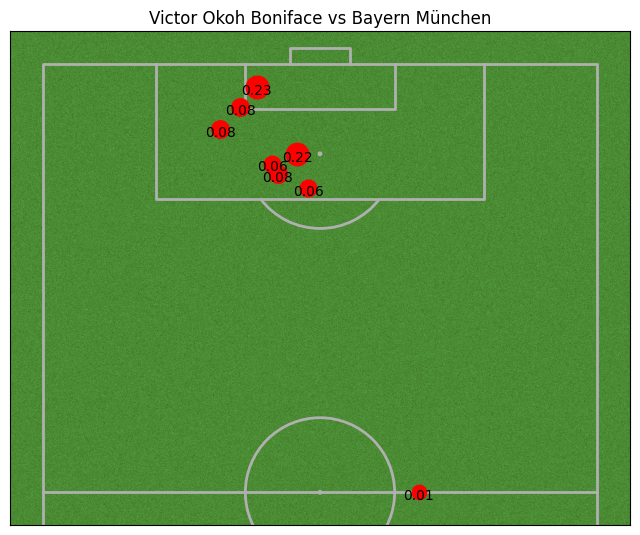

In [114]:
fig = plt.figure(figsize = (8,8), dpi = 100)
ax = plt.subplot(111)

colors = "red"

# Notice the extra parameters passed to the object
pitch = VerticalPitch(
    pitch_type = "uefa",
    half = True,
    axis = True, 
    label = False, 
    tick = False,
    pitch_color="grass",
    goal_type="box"
)

pitch.draw(ax = ax)
i=0
# Hypothetical shot.
for i in range(length):
    if match_shots[i]["playerName"] == playername:
        ax.set_title(playername + " vs " + opponent_name)
    if match_shots[i]["playerName"] == playername and match_shots[i]["eventType"] == "Goal":
        colors = "darkgreen"
        ax.scatter(match_shots[i]["y"],match_shots[i]["x"], s = (round(match_shots[i]["expectedGoals"], 2)*720) + 100, c=colors)
        ax.annotate(round(match_shots[i]["expectedGoals"], 2), (match_shots[i]["y"],match_shots[i]["x"]), textcoords="offset points", xytext=(0, -5),  ha="center")
    if match_shots[i]["playerName"] == playername and match_shots[i]["eventType"] != "Goal":
        colors = "red"
        ax.scatter(match_shots[i]["y"],match_shots[i]["x"], s = (round(match_shots[i]["expectedGoals"], 2)*720) + 100, c=colors)
        ax.annotate(round(match_shots[i]["expectedGoals"], 2), (match_shots[i]["y"],match_shots[i]["x"]), textcoords="offset points", xytext=(0, -5),  ha="center")
